# 회귀 실습 - 결근 패턴 분석 대회 데이터 만들기

- 2021년 상반기 SAI A-ML팀 회귀 실습
- 6월 25일 작성
- Dataset 출처: [UCI Absenteeism at Work](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

In [2]:
# 패키지 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 가상환경 설정
  - numpy == 1.20.2
  - sklearn == 0.24.2
  - matplotlib == 3.3.4
  - seaborn == 0.11.1
  - pandas == 1.2.5
  - tensorflow == 2.3.0

## Dataset 불러오고 확인하기

In [6]:
data = pd.read_csv('Absenteeism_at_work.csv', sep=';') # 파일을 뜯어 보니 구분자가 , 가 아닌 ; 로 되어 있음

In [132]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4.0
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0.0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2.0
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4.0
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8.0
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4.0
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0.0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

총 740개의 row가 있고, 결손 데이터는 없는 것을 확인했다.

In [28]:
data['Hit target'].value_counts()

93     105
99     102
97      89
92      79
95      75
96      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64

In [98]:
# regression을 위해서.
data = data.astype({'Absenteeism time in hours':'float32'})

In [99]:
from sklearn.model_selection import train_test_split

X = data.loc[:, 'ID':'Body mass index']
y = data.loc[:, 'Absenteeism time in hours']

<AxesSubplot:title={'center':'y_test_distribution'}>

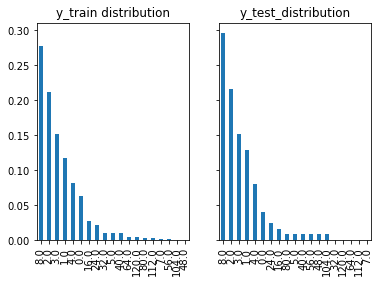

In [100]:
r = int(input())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=125, random_state=r)

y_train_counts = y_train.value_counts() / len(y_train)
y_test_counts = y_test.value_counts() / len(y_test)

for i in y.value_counts().index:
    if i not in y_train_counts.index:
        y_train_counts[i] = 0
    elif i not in y_test_counts.index:
        y_test_counts[i] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
y_train_counts.plot(kind='bar', ax=ax1, title='y_train distribution')
y_test_counts.plot(kind='bar', ax=ax2, title='y_test_distribution')

In [102]:
y.value_counts()

8.0      208
2.0      157
3.0      112
1.0       88
4.0       60
0.0       44
16.0      19
24.0      16
40.0       7
5.0        7
32.0       6
120.0      3
80.0       3
64.0       3
56.0       2
112.0      2
7.0        1
104.0      1
48.0       1
Name: Absenteeism time in hours, dtype: int64

<AxesSubplot:>

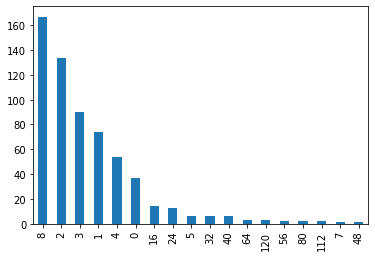

In [54]:
y_train.value_counts().plot(kind='bar')

In [104]:
X_train.loc[:, 'Absenteeism time in hours'] = y_train

C:\Users\35896\Anaconda3\envs\2021MLstudy\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [106]:
X_train

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
137,27,23,2,6,2,184,42,7,27,302.585,...,0,1,0,0,0,0,58,167,21,1.0
210,14,28,5,2,3,155,12,14,34,378.884,...,0,1,2,1,0,0,95,196,25,2.0
311,20,0,10,3,4,260,50,11,36,265.017,...,1,1,4,1,0,0,65,168,23,0.0
514,15,23,10,6,4,291,31,12,40,284.853,...,0,1,1,1,0,1,73,171,25,1.0
18,6,11,7,5,1,189,29,13,33,239.554,...,0,1,2,0,0,2,69,167,25,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,11,22,1,5,2,289,36,13,33,308.593,...,0,1,2,1,0,1,90,172,30,3.0
465,34,26,7,6,1,118,10,10,37,230.290,...,0,1,0,0,0,0,83,172,28,8.0
19,33,23,8,4,1,248,25,14,47,205.917,...,0,1,2,0,0,1,86,165,32,2.0
368,3,28,1,6,2,179,51,18,38,330.061,...,0,1,0,1,0,0,89,170,31,1.0


In [120]:
data.iloc[X_train.index]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
137,27,23,2,6,2,184,42,7,27,302.585,...,0,1,0,0,0,0,58,167,21,1.0
210,14,28,5,2,3,155,12,14,34,378.884,...,0,1,2,1,0,0,95,196,25,2.0
311,20,0,10,3,4,260,50,11,36,265.017,...,1,1,4,1,0,0,65,168,23,0.0
514,15,23,10,6,4,291,31,12,40,284.853,...,0,1,1,1,0,1,73,171,25,1.0
18,6,11,7,5,1,189,29,13,33,239.554,...,0,1,2,0,0,2,69,167,25,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,11,22,1,5,2,289,36,13,33,308.593,...,0,1,2,1,0,1,90,172,30,3.0
465,34,26,7,6,1,118,10,10,37,230.290,...,0,1,0,0,0,0,83,172,28,8.0
19,33,23,8,4,1,248,25,14,47,205.917,...,0,1,2,0,0,1,86,165,32,2.0
368,3,28,1,6,2,179,51,18,38,330.061,...,0,1,0,1,0,0,89,170,31,1.0


In [121]:
X_train.equals(data.iloc[X_train.index])

True

In [122]:
print(X_train.shape)
print(X_test.shape)

(615, 21)
(125, 20)


In [124]:
y_test.shape

(125,)

In [151]:
sample_submission = pd.Series(np.zeros(125, dtype='float32'))
sample_submission.shape

(125,)

In [148]:
X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [159]:
y_test.reset_index(drop=True, inplace=True)
solution = pd.DataFrame({'Id': y_test.index, 'Expected':y_test.values})
sample = pd.DataFrame({'Id': sample_submission.index, 'Prediction':sample_submission.values})

In [160]:
solution.to_csv('solution.csv', index=False)
sample.to_csv('sample_submission.csv', index=False)

In [162]:
sample_submission.to_csv('sample.csv', index=False, header=False)